In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset

dataset = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [3]:
# Viewing first 7 rows

dataset.head(7)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0


In [11]:
# Viewing columns in dataset

dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [16]:
# Choosing features

filter_columns = [
       'Education', 'Marital_Status', 'Income',
       'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain'
]

filter_dataset = dataset[filter_columns]

In [17]:
filter_dataset.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,Graduation,Single,58138.0,58,635,88,546,172,88,88,...,8,10,4,7,0,0,0,0,0,0
1,Graduation,Single,46344.0,38,11,1,6,2,1,6,...,1,1,2,5,0,0,0,0,0,0
2,Graduation,Together,71613.0,26,426,49,127,111,21,42,...,8,2,10,4,0,0,0,0,0,0
3,Graduation,Together,26646.0,26,11,4,20,10,3,5,...,2,0,4,6,0,0,0,0,0,0
4,PhD,Married,58293.0,94,173,43,118,46,27,15,...,5,3,6,5,0,0,0,0,0,0


In [18]:
# Data Preprocessing

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Label Encoding
enc = LabelEncoder()
filter_dataset['Education'] = enc.fit_transform(filter_dataset['Education'])
filter_dataset['Marital_Status'] = enc.fit_transform(filter_dataset['Marital_Status'])

# Data Scaling
sc = StandardScaler()
filter_dataset.iloc[:,2:] = sc.fit_transform(filter_dataset.iloc[:,2:])


c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [22]:
filter_dataset.dropna(inplace = True)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [43]:
# K-Means
from sklearn.cluster import KMeans

wcss = []
clus = [x for x in range(1, 9)]

for c in clus:
    km = KMeans(n_clusters = c, init = 'k-means++')
    km.fit(filter_dataset.values)
    wcss.append(km.inertia_)


Text(0, 0.5, 'WCSS')

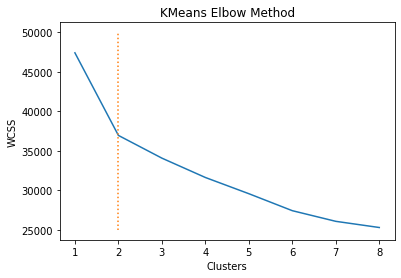

In [45]:
# Visualize Results

plt.plot(clus, wcss)
plt.plot((2,2), (25000, 50000), linestyle = 'dotted')
plt.title('KMeans Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [47]:
km = KMeans(n_clusters = 2, init = 'k-means++')
km.fit(filter_dataset)

KMeans(n_clusters=2)

In [64]:
kmeans_c1 = list(km.labels_).count(0)
kmeans_c2 = list(km.labels_).count(1)
print('Cluster 1 customer count:', kmeans_c1)
print('Cluster 2 customer count:', kmeans_c2)

Cluster 1 customer count: 1357
Cluster 2 customer count: 859


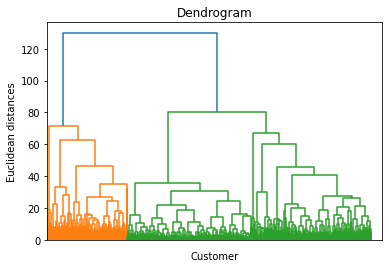

In [83]:
# Hierarical clustering

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(filter_dataset, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.xticks(np.arange(0, 23000, step=100))
plt.xlabel('Customer')
plt.show()

In [81]:
# Using Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
Y = hc.fit_predict(filter_dataset)

In [82]:
Y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
hier_c1 = list(Y).count(0)
hier_c2 = list(Y).count(1)

print('Cluster 1 customer count:', hier_c1)
print('Cluster 2 customer count:', hier_c2)

Cluster 1 customer count: 1668
Cluster 2 customer count: 548
